In [1]:
import scipy.io
import numpy as np, h5py
import matplotlib.pyplot as plt
import copy
import pickle
%matplotlib inline

In [2]:
data = h5py.File('littleScans62.mat', 'r')
Xscans=data.get('littleScans')
print Xscans.shape

(16, 16, 16, 62)


In [3]:
X=copy.copy(Xscans)
X=np.expand_dims(X,0)
X=X.reshape((62, 16, 16, 16, 1))
print X.shape

(62, 16, 16, 16, 1)


In [4]:
y=np.zeros((np.shape(X)[0],1))
y[:26]=1
ysq=np.squeeze(y).astype(int)

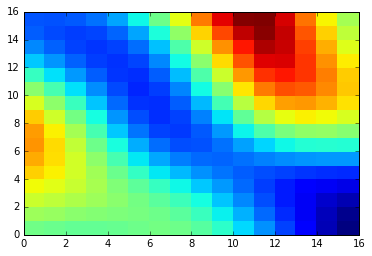

In [5]:
plt.pcolor(Xscans[0,:,:,10])

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Convolution3D
from keras.layers.pooling import MaxPooling3D
from keras.layers.core import Dense, Flatten
from keras.layers import Dropout
import time

Using TensorFlow backend.


In [7]:
from keras.utils.np_utils import to_categorical
y_binary = to_categorical(ysq)

image dimension order according https://www.youtube.com/watch?v=38ASRfA23t0   
tf: inputshape=(img_rows, img_cols,img_channels)   
theano: inputshape=(img_channels,img_rows, img_cols)

In [12]:
model.reset_states()

In [8]:
model=Sequential()
model.add(Convolution3D(32, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))
model.add(Flatten())
model.add(Dense(100, init='uniform', activation='tanh'))
model.add(Dense(2, init='uniform', activation='tanh'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Fit the model
t0 = time.time()
history=model.fit(X, y_binary, nb_epoch=1000, batch_size=10,verbose=0)
t1 = time.time()
print t1-t0

34991.561377


In [11]:
model.save('m7b_1000.h5')

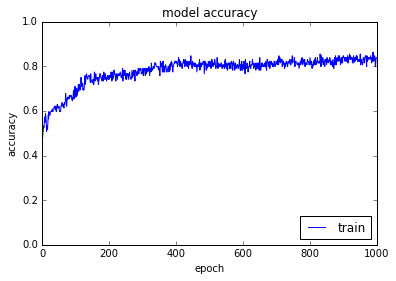

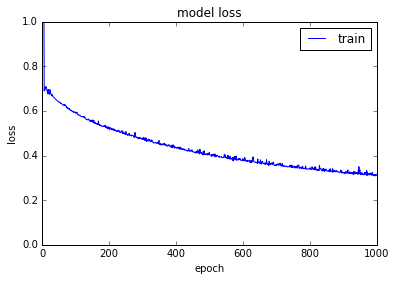

In [10]:
###### PLOTS summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.ylim([0, 1])
plt.show()
# summarize history for accuracy
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.ylim([0, 1])
plt.show()

---

### Model 1
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
#model.add(MaxPooling3D(pool_size=(2,2,2),strides=None, border_mode='valid', dim_ordering='default'))   

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   

---

### Model 2
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(MaxPooling3D(pool_size=(2, 2, 2)))   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

---

### Model 3
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(MaxPooling3D(pool_size=(2, 2, 2)))   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

---

### Model 4
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(MaxPooling3D(pool_size=(2, 2, 2)))   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(MaxPooling3D(pool_size=(2, 2, 2)))   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   

---

### Model 5
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(Dropout(0.2))   
model.add(Convolution3D(10, 3, 3, 3, border_mode='valid', activation='relu'))   
model.add(MaxPooling3D(pool_size=(2, 2, 2)))   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   

---

### Model 6
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

---

### Model 7
#### Number of kernels
model=Sequential()   
model.add(Convolution3D(32, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])